### Problem 2

I omitted solution for (1) and (2), since they are all included in (3), below shows some of the important code.
- my implemetation in detail is in the appendix.
- code below assumes beta_0(bias) is zero
    - to cope with the problem which assumes true beta being (-2, 1) instead of (0, -2, 1)
    - if bias also has to be estimated, just change IRLS() function
    - experiment shows this assumption does not make much difference

In [1]:
#!/usr/bin/env python -W ignore::DeprecationWarning
from hw_1_2 import gen_label, IRLS, get_fisher_information
import numpy as np
np.random.seed(1234)

n = 100
X = np.random.normal(size=(n, 2))

Below are code used to plot
- asymptotical distribution, and 
- scatter plot of estimated beta

Note that levels for (3) are \[1, ..., 10\] while for (4), \[1, 2, ..., 1024\]

In [2]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
def plot_new(X, weight, area, small_contour):
    func_z = multivariate_normal(mean=np.asarray((-2, 1))
                                 , cov=np.linalg.inv(get_fisher_information(X, (-2,1))))
    xlist = np.linspace(area[0], area[1], 100)
    ylist = np.linspace(area[2], area[3], 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.empty(shape=X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = func_z.pdf([X[i][j], Y[i][j]])
    # note that countors in two graphs are different w.r.t. levels
    if not small_contour:
        levels = [(1 << i) for i in range(1, 11)]
        plt.contour(X, Y, Z, levels, colors='k')
        plt.scatter(weight[:, 0], weight[:, 1])
        plt.show()
    else:
        levels = [i / 5 for i in range(1, 11)]
        plt.contour(X, Y, Z, levels, colors='k')
        plt.scatter(weight[:, 0], weight[:, 1])
        plt.show()

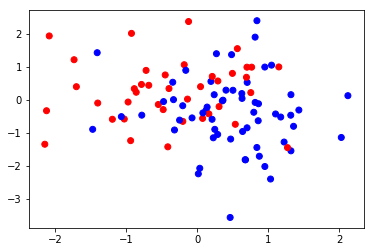

In [3]:
weight = np.empty(shape=(n, 2))
for i in range(100):
    y = gen_label(X)
    if(i == 0):
        color = ['b' if y[i] == 0 else 'r' for i in range(0, 100)]
        plt.scatter(X[:, 0], X[:, 1], color=color)
    weight[i] = IRLS(X, y)

Above plot visulizes a possible observation Y from true parameter

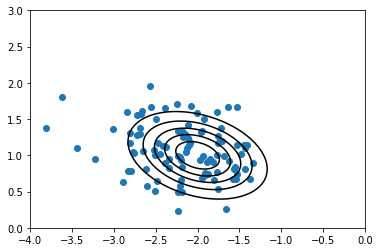

In [4]:
plot_new(X, weight, area=[-4.,0.,0.,3.], small_contour=1)

The asymptotical distribution serves as a good distribution from plot above

In [5]:
print("Covariance matrix form fisher information is \n"
      , np.linalg.inv(get_fisher_information(X, (-2,1))))
print("Covariance matrix from expirical data is \n"
      , np.cov(np.transpose(weight)))

Covariance matrix form fisher information is 
 [[ 0.19350715 -0.0440933 ]
 [-0.0440933   0.10205911]]
Covariance matrix from expirical data is 
 [[ 0.25623927 -0.04276872]
 [-0.04276872  0.12578528]]


, but there are still some discrapancy in estimating the covariance matrix

In [6]:
n = 10000
X = np.random.normal(size=(n, 2))
weight = np.empty(shape=(100, 2))
for i in range(100):
    y = gen_label(X)
    weight[i] = IRLS(X, y)

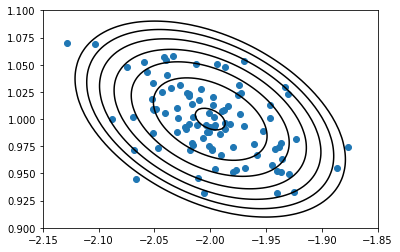

In [7]:
plot_new(X, weight, area=[-2.15, -1.85, 0.9, 1.1], small_contour=0)

The asymptotical distribution fits emperical data better from plot above, when # of data points is larger.

This can also be shown from the estimation of covariance matrix

In [8]:
print("Covariance matrix form fisher information is \n"
      , np.linalg.inv(get_fisher_information(X, (-2,1))))
print("Covariance matrix from expirical data is \n"
      , np.cov(np.transpose(weight)))

Covariance matrix form fisher information is 
 [[ 0.00174037 -0.00053367]
 [-0.00053367  0.00096422]]
Covariance matrix from expirical data is 
 [[ 0.00202756 -0.00069806]
 [-0.00069806  0.00105249]]
